# Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Introduction

In [5]:
encoder_input = keras.Input(shape=(28, 28, 1), name = "img")
x = layers.Conv2D(16, 3, activation = "relu")(encoder_input)
x = layers.Conv2D(32, 3, activation = "relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation = "relu")(x)
x = layers.Conv2D(16, 3, activation = "relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

In [6]:
encoder = keras.Model(encoder_input, encoder_output, name = "encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [8]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation = "relu")(x)
x = layers.Conv2DTranspose(32, 3, activation = "relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation = "relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation = "relu")(x)

In [9]:
autoencoder = keras.Model(encoder_input, decoder_output, name = "autoencoder")

In [10]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                

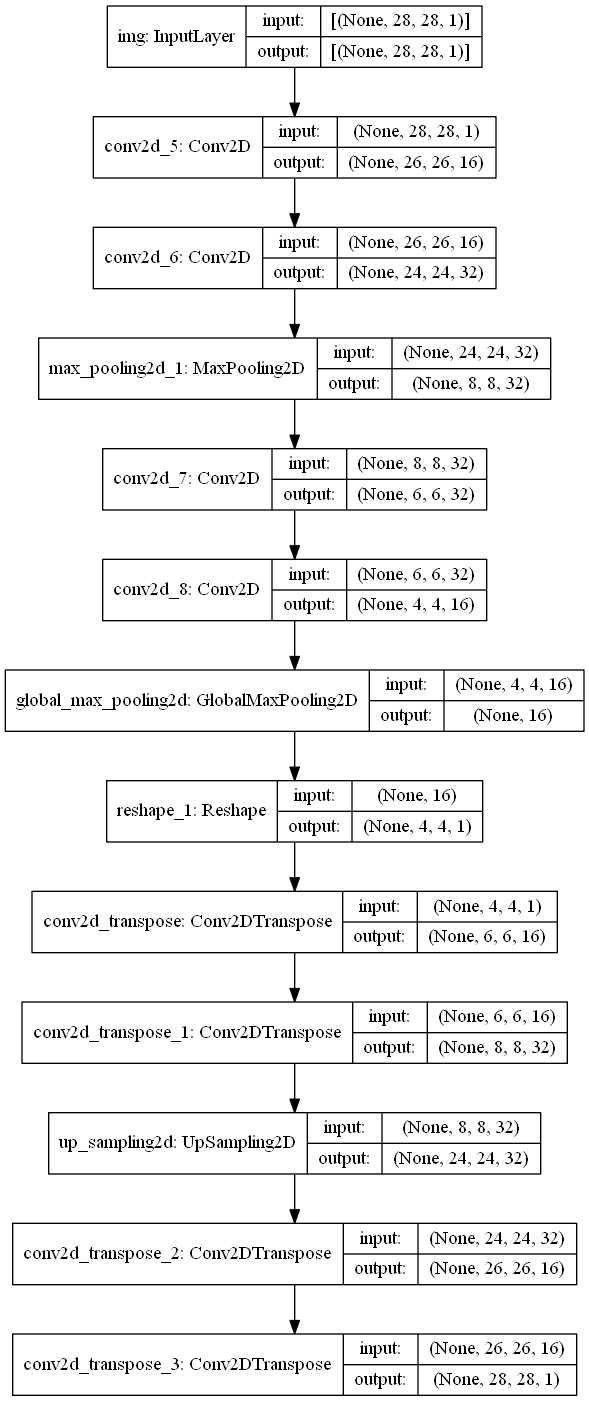

In [11]:
keras.utils.plot_model(autoencoder, "autoencoder_shape_info.png", show_shapes=True)